In [0]:
import PIL

import random
import os

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
import urllib

def get_celeb_files():
    
    if not os.path.exists('img_align_celeba'):
        os.mkdir('img_align_celeba')
    for img_i in range(1, 101):
        f = '000%03d.jpg' % img_i
        if os.path.exists('img_align_celeba/'+f):
            continue
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f
        print(url, end='\r')
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))

    files = [os.path.join('img_align_celeba', file_i)
             for file_i in os.listdir('img_align_celeba')
             if '.jpg' in file_i]
    return files

In [0]:
files = get_celeb_files()

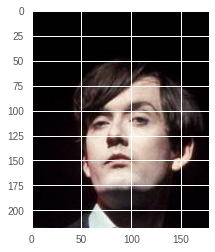

In [4]:
img = plt.imread(files[50])
plt.imshow(img)

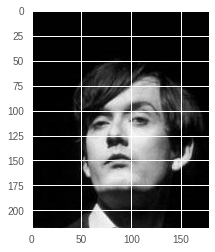

In [5]:
plt.imshow(img[:,:,1], cmap='gray')

In [0]:
imgs = [plt.imread(x) for x in files]

In [0]:
data = np.array(imgs)

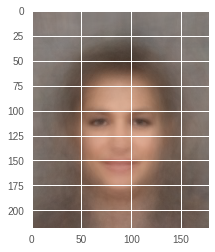

In [8]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

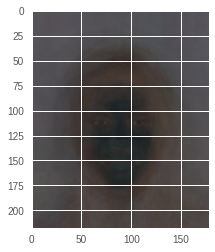

In [9]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8), cmap='hot')

In [0]:
flattened = data.ravel()
#print(data[:1])

(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

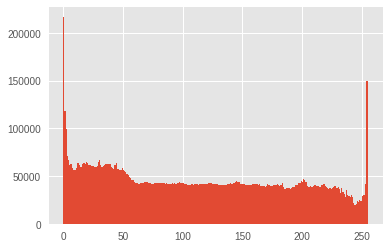

In [11]:
plt.hist(flattened.ravel(), 255)

(array([3.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 6.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 1.000e+01, 7.000e+00, 1.000e+01, 1.200e+01,
        1.100e+01, 1.100e+01, 1.500e+01, 1.900e+01, 2.900e+01, 2.300e+01,
        2.000e+01, 2.300e+01, 2.500e+01, 2.300e+01, 2.300e+01, 2.400e+01,
        2.400e+01, 2.000e+01, 2.700e+01, 3.200e+01, 5.200e+01, 4.300e+01,
        5.100e+01, 3.800e+01, 4.700e+01, 5.100e+01, 6.500e+01, 7.000e+01,
        9.500e+01, 7.700e+01, 1.030e+02, 1.160e+02, 1.040e+02, 1.170e+02,
        9.900e+01, 1.320e+02, 1.500e+02, 1.760e+02, 1.910e+02, 2.180e+02,
        2.710e+02, 2.680e+02, 3.030e+02, 3.430e+02, 3.220e+02, 3.460e+02,
        3.800e+02, 3.490e+02, 3.540e+02, 3.600e+02, 3.620e+02, 3.600e+02,
        3.640e+02, 3.240e+02, 3.860e+02, 4.180e+02, 3.280e+02, 3.560e+02,
        3.550e+02, 3.420e+02, 3.540e+02, 3.350e+02, 3.550e+02, 3.590e+02,
        3.550e+02, 3.680e+02, 3.650e+02, 3.950e+02, 3.750e+02, 3.560e+02,
        3.650e+02, 3.690e+02, 3.710e+0

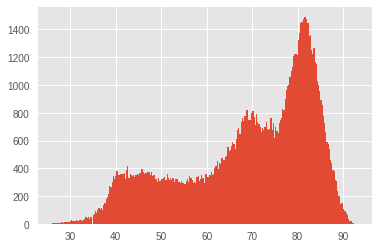

In [12]:
plt.hist(std_img.ravel(), 255)

Text(0.5,1,'(img - mean) distribution')

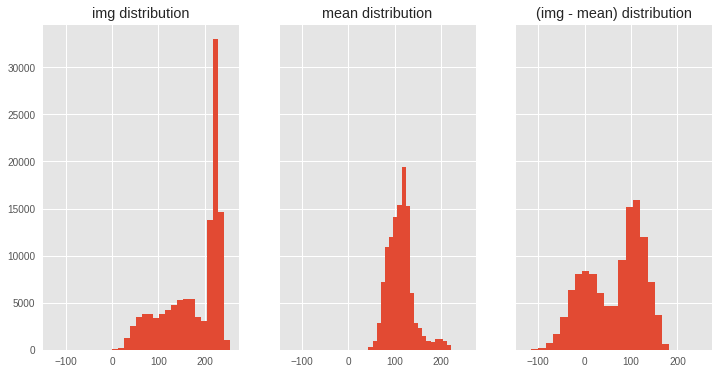

In [13]:
bins  =  20
fig,  axs  =  plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')


Text(0.5,1,'((img - mean) / std_dev) distribution')

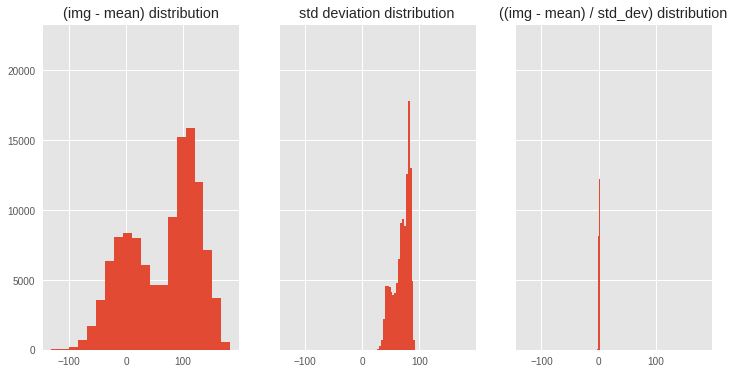

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

(-5, 5)

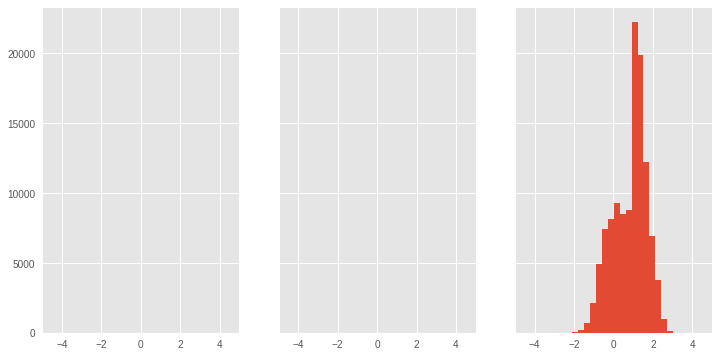

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
#axs[0].hist((data[0] - mean_img).ravel(), bins)
#axs[1].hist((data[0] - std_img).ravel(), bins)
axs[2].hist(((data[0] - mean_img)/std_img).ravel(), bins)
axs[2].set_xlim([-5, 5])

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tj = plt.imread('/content/drive/My Drive/passport.png')

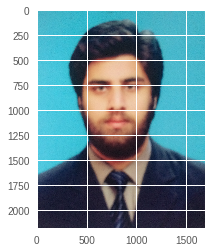

In [34]:
plt.imshow(tj)